In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data=pd.read_csv('Mall_Customers.csv',index_col ='CustomerID')

In [4]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [97]:
data.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


### Visualizing the data

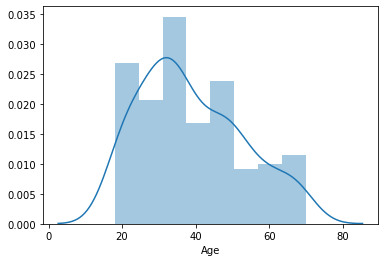

In [29]:
sns.distplot(data['Age'])

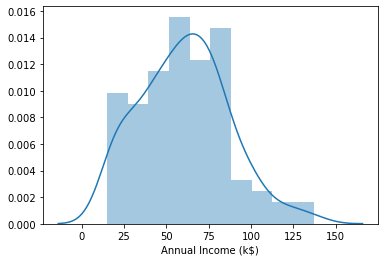

In [93]:
sns.distplot(data['Annual Income (k$)'])

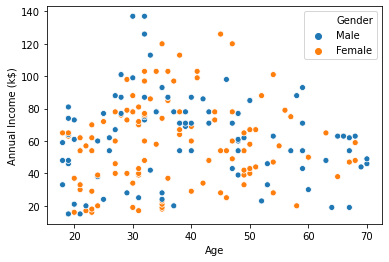

In [94]:
sns.scatterplot(x='Age',y='Annual Income (k$)',data=data,hue='Gender')

This plot shows that Age does not follow any regular distribution with Annual income

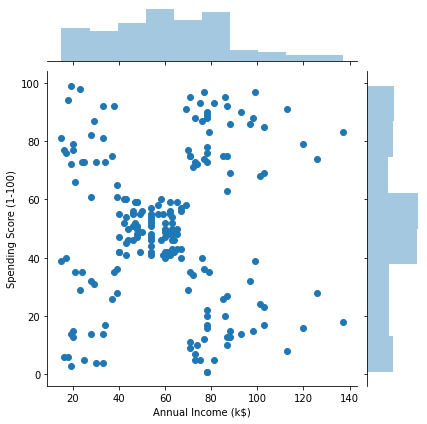

In [87]:
sns.jointplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=data)

It can be seen that the data forms clusters when the Spending Score is compared with the Annual Income

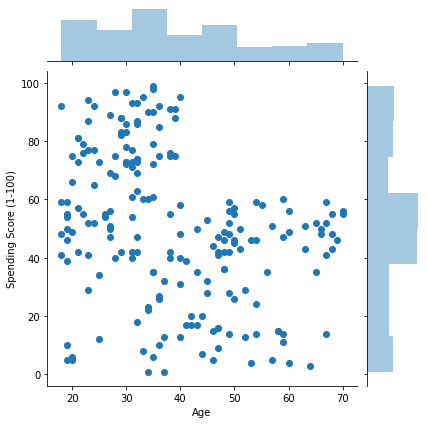

In [92]:
sns.jointplot(y='Spending Score (1-100)',x='Age',data=data)

The highest spenders are found to be less than 40 years. Older people spend moderately or sparsely 

In [96]:
X=data.iloc[:,1:].values

### Finding optimal number of clusters using the Elbow Method

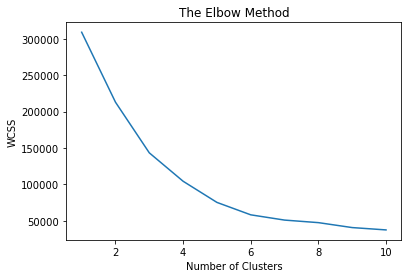

In [40]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The WCSS value first diminishes at 5 as shown on the graph. Thus, we set the number of clsters to 5

### Applying K-Means to the data

In [95]:
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)
y_kmeans

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

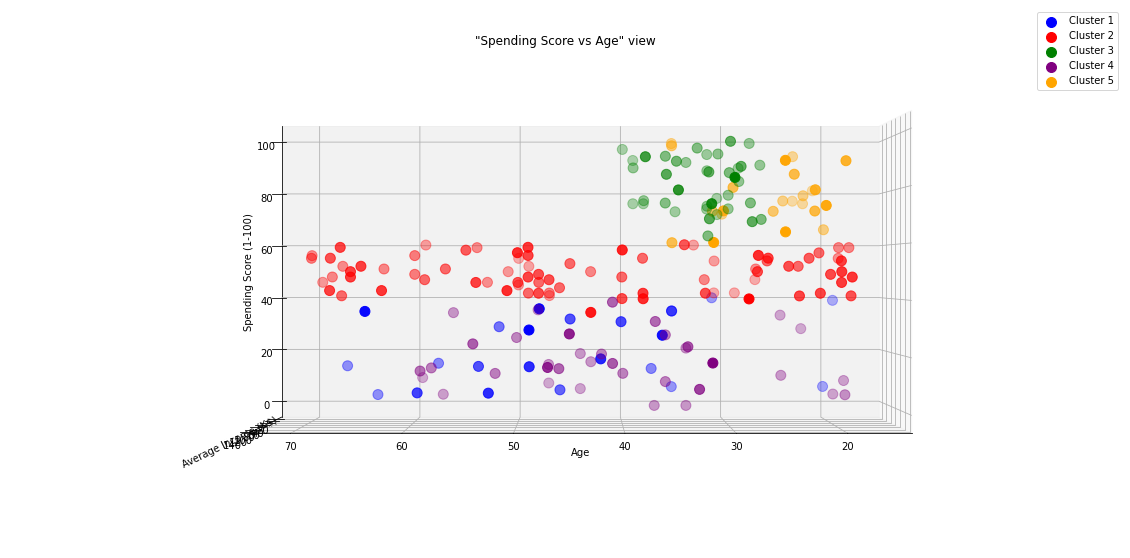

In [100]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],X[y_kmeans==0,2],s=100,c='blue',label='Cluster 1')
ax.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],X[y_kmeans==1,2],s=100,c='red',label='Cluster 2')
ax.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],X[y_kmeans==2,2],s=100,c='green',label='Cluster 3')
ax.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],X[y_kmeans==3,2],s=100,c='purple',label='Cluster 4')
ax.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],X[y_kmeans==4,2],s=100,c='orange',label='Cluster 5')
ax.view_init(0,90)
plt.title('"Spending Score vs Age" view')
plt.xlabel('Age')
plt.ylabel('Average Income (K$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

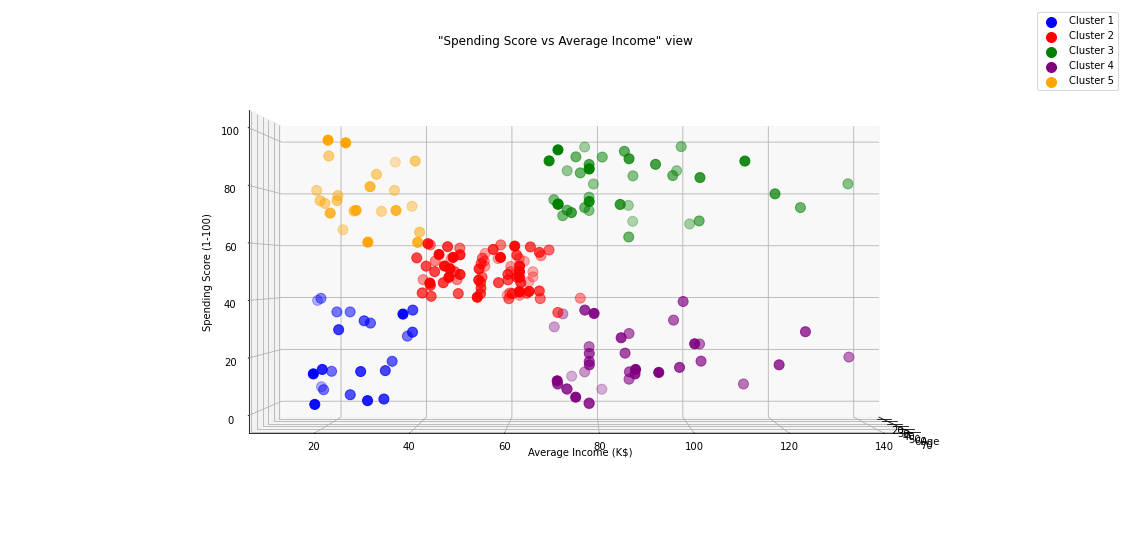

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],X[y_kmeans==0,2],s=100,c='blue',label='Cluster 1')
ax.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],X[y_kmeans==1,2],s=100,c='red',label='Cluster 2')
ax.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],X[y_kmeans==2,2],s=100,c='green',label='Cluster 3')
ax.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],X[y_kmeans==3,2],s=100,c='purple',label='Cluster 4')
ax.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],X[y_kmeans==4,2],s=100,c='orange',label='Cluster 5')
ax.view_init(0,0)
plt.title('"Spending Score vs Average Income" view')
plt.xlabel('Age')
plt.ylabel('Average Income (K$)')
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Inference and Conclusion

From the visualization, there is no correlation between age and annual income.

Higest spenders are less than 40 years old. They make-up cluster 3 and 5. These groups are the main target of the mall and thus, their purchase patterns should be studied in order to offer improved services to them. They can also be easily introduced and convinced to buy new products.

Cluster 1 are low spenders with low annual income as well. They can be said to come to the mall for basic/necessary needs only. 

Cluster 2 contains average earners who also spend averagely. They can be referred to as moderate spenders.

Cluster 4 members earn a high income annually but do not spend much. They can be treated in a similar way as Cluster 1 members.